Now we analyse the cluster size data that we've generated

- We first do log binning for our data
- We then perform finite-size scaling analysis on the log binned data
- We start with the microjam distribution

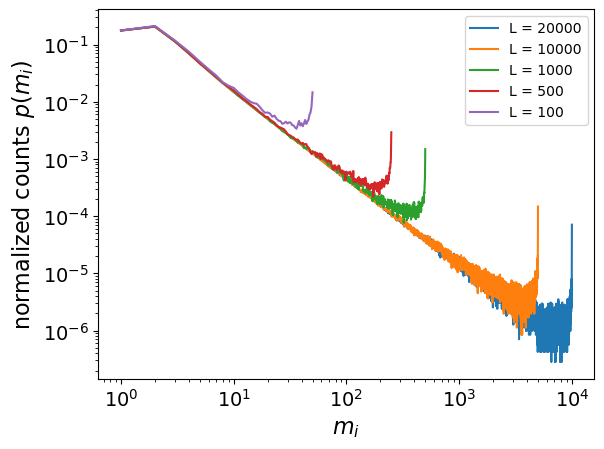

In [8]:
#Now we plot our microjams from the saved file for each system size - 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file for microjam sizes
file_name = 'microjam_size_distribution_rho_0pt5.xlsx'
df = pd.read_excel(file_name)

trial  = 1000 #trial used for data

# Find unique L values from the column names in the file
L_array = [int(col.split('=')[1].split(')')[0]) for col in df.columns if 'Microjam sizes' in col]

# Plot the data for each L
plt.figure()

for aleph in reversed(range(len(L_array))):
    
    N = L_array[aleph]
    
    # Get the x (microjam sizes) and y (counts) data for this L
    x = df[f'Microjam sizes (L={L_array[aleph]})'].dropna().values
    y = df[f'Counts (L={L_array[aleph]})'].dropna().values
    y = y / np.sum(y)
    
    #Now we log-bin the data
    #base = 1.2  # Base for binning
    #area_arr = np.logspace(0, int(np.log(N) / np.log(base)) - 1, num=int(np.log(N) / np.log(base)), base=base) #for cluster it is log(N*N)
    #num_area_arr = np.zeros(len(area_arr))
    
    #for j in range(len(area_arr)):
    #    num_area_arr[j] += np.sum(y[int(area_arr[j])-1:int(2 * area_arr[j])-1]) / (area_arr[j] * trial)
    
    #plt.loglog(area_arr, num_area_arr, marker='.', linestyle='None', label='Binned data')
    plt.loglog(x,y, label=f'L = {N}' )
plt.xlabel(r'$m_i$', fontsize=16)  # LaTeX-style x-axis label with larger font
plt.ylabel(r'normalized counts $p(m_i)$', fontsize=16)  # LaTeX-style y-axis label with larger font
#plt.xlim(0, 1)  # Set x-axis limits
plt.xticks(fontsize=14)  # Bigger font size for x-axis ticks
plt.yticks(fontsize=14)  # Bigger font size for y-axis ticks
plt.legend( frameon=True)  # Bigger font size for the legend
plt.show()

In [ ]:
#Now we check that the 


#Now we apply finite size scaling to the log-binned distribution! 



Now we perform a scaling collapse - 

This is because we can rewrite -

$$n(s, p, L) = s^{-\tau}f(s^a/L)$$

as

$$ ln(n(s,p,L)) + \frac{\tau}{a}ln(L) = ln f(ln(s) - \frac{1}{a}ln(L)) $$

We know that the value of $$\tau = 1.5$$, we search for the value of a - 



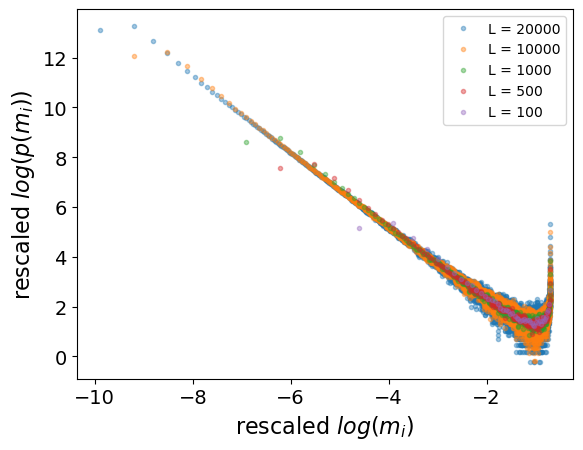

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file for microjam sizes
file_name = 'microjam_size_distribution_rho_0pt5.xlsx'
df = pd.read_excel(file_name)

# Find unique L values from the column names in the file
L_array = [int(col.split('=')[1].split(')')[0]) for col in df.columns if 'Microjam sizes' in col]

plt.figure()

tau = 1.5
a = 1
#l = tau/a
#m = -1*(1/a)

#l = 1.5
#m = 10

for aleph in reversed(range(len(L_array))):
    
    N = L_array[aleph]
    
    # Get the x (microjam sizes) and y (counts) data for this L
    x1 = df[f'Microjam sizes (L={L_array[aleph]})'].dropna().values
    y1 = df[f'Counts (L={L_array[aleph]})'].dropna().values
    y1 = y1 / np.sum(y1)
    
    #Now we log-bin the data
    ##base = 1.2  # Base for binning
    ##area_arr = np.logspace(0, int(np.log(N) / np.log(base)) - 1, num=int(np.log(N) / np.log(base)), base=base) #for cluster it is log(N*N)
    ##num_area_arr = np.zeros(len(area_arr))
    
    ##for j in range(len(area_arr)):
    ##    num_area_arr[j] += np.sum(y1[int(area_arr[j])-1:int(2 * area_arr[j])-1]) / (area_arr[j])
    
    ##x = area_arr
    ##y = num_area_arr
    x = x1 #Doing our analysis without log binning
    y = y1
    y = np.log(y) + (tau/a)*np.log(L_array[aleph])#np.log(y) + (l)*np.log(L_array[aleph])
    x = np.log(x) - (1/a)*np.log(L_array[aleph])#np.log(x) + (m)*np.log(L_array[aleph])
    ### Plot the counts as a function of the values
    ###plt.loglog(np.arange(len(cluster_count)), cluster_count/trial,  marker='o', linestyle = 'none')
    plt.plot(x, y, marker='.', linestyle = 'none', label = 'L = '+str(L_array[aleph]), alpha =0.4)

plt.xlabel(r'rescaled $log(m_i)$', fontsize=16)
plt.ylabel('rescaled $log(p(m_i))$', fontsize=16)
plt.xticks(fontsize=14)  # Bigger font size for x-axis ticks
plt.yticks(fontsize=14)  # Bigger font size for y-axis ticks
#plt.title('finite size collapse of cluster lifetimes for a = '+str(a)+' and tau = '+str(tau))
plt.legend(loc = 'best')
#plt.grid(True)
plt.show()

C:\Users\aryam\AppData\Local\Temp\ipykernel_27588\1925594771.py:41: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0.001,0)


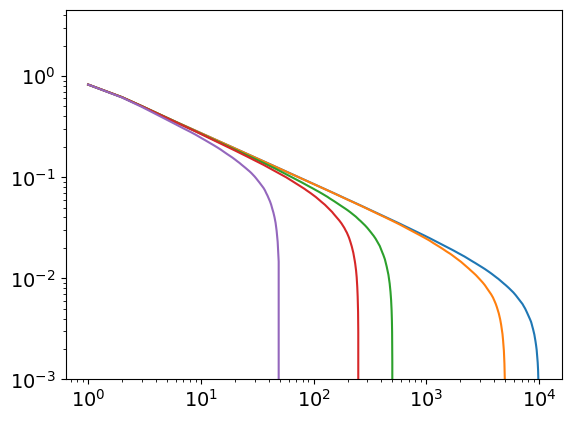

In [10]:
#CDF because PDF is noisy and CDF should be less noisy...

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file for microjam sizes
file_name = 'microjam_size_distribution_rho_0pt5.xlsx'
df = pd.read_excel(file_name)

trial  = 1000 #trial used for data

# Find unique L values from the column names in the file
L_array = [int(col.split('=')[1].split(')')[0]) for col in df.columns if 'Microjam sizes' in col]

# Plot the data for each L
plt.figure()

for aleph in reversed(range(len(L_array))):
    
    N = L_array[aleph]
    
    # Get the x (microjam sizes) and y (counts) data for this L
    x = df[f'Microjam sizes (L={L_array[aleph]})'].dropna().values
    y = df[f'Counts (L={L_array[aleph]})'].dropna().values
    
    # Normalize y (PDF) by dividing by the total sum
    y_normalized = y / np.sum(y)

    # Compute the cumulative sum of the normalized PDF to get the CDF
    cdf = np.cumsum(y_normalized)
    
    survival_func = 1 - cdf

    # Plot the CDF
    plt.loglog(x, survival_func, label=f'L={N}')

# Add plot labels and title
#plt.xlabel('Microjam size')
#plt.ylabel('Survival func')
plt.ylim(0.001,0)
plt.xticks(fontsize=14)  # Bigger font size for x-axis ticks
plt.yticks(fontsize=14)  # Bigger font size for y-axis ticks
#plt.title('Survival func of Microjam Sizes')
#plt.legend()

# Show the plot
plt.show()
    

Slope (beta) for L=20000: -0.509


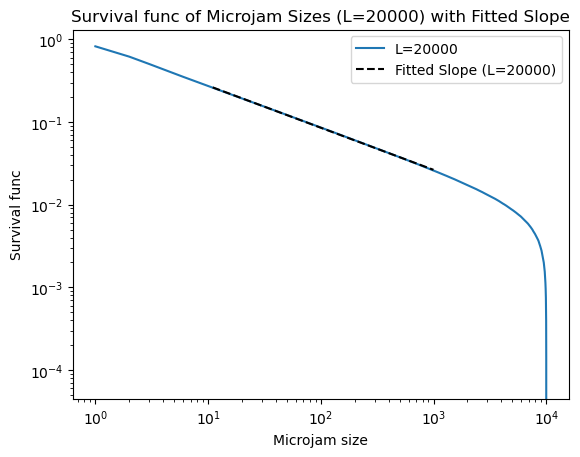

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Load the Excel file for microjam sizes
file_name = 'microjam_size_distribution_rho_0pt5.xlsx'
df = pd.read_excel(file_name)

trial = 1000  # trial used for data

# System size L=20000
L = 20000

# Get the x (microjam sizes) and y (counts) data for L=20000
x = df[f'Microjam sizes (L={L})'].dropna().values
y = df[f'Counts (L={L})'].dropna().values

# Normalize y (PDF) by dividing by the total sum
y_normalized = y / np.sum(y)

# Compute the cumulative sum of the normalized PDF to get the CDF
cdf = np.cumsum(y_normalized)

survival_func = 1 - cdf

# Plot the survival function
plt.loglog(x, survival_func, label=f'L={L}')

# Define a power-law function for fitting
def power_law(x, a, b):
    return a * np.power(x, b)

# Automatically select a range for fitting (linear regime in log-log scale)
fit_range = (x > 10) & (x < 1000)  # Adjust this range based on the plot

# Fit the power-law model to the linear part
popt, pcov = curve_fit(power_law, x[fit_range], survival_func[fit_range])

# Extract the slope (popt[1])
a, b = popt
print(f'Slope (beta) for L={L}: {b:.3f}')

# Plot the fitted power-law line
plt.loglog(x[fit_range], power_law(x[fit_range], *popt), linestyle='--', color='black', label=f'Fitted Slope (L={L})')

# Add plot labels and title
plt.xlabel('Microjam size')
plt.ylabel('Survival func')
plt.title('Survival func of Microjam Sizes (L=20000) with Fitted Slope')
plt.legend()

# Show the plot
plt.show()


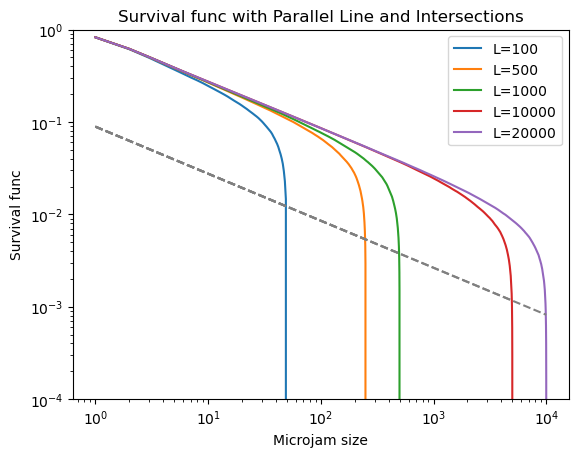

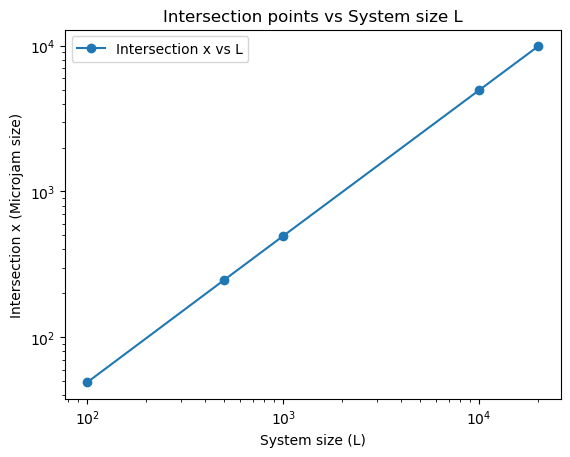

L=100, Intersection x=49.0
L=500, Intersection x=247.0
L=1000, Intersection x=495.0
L=10000, Intersection x=4954.0
L=20000, Intersection x=9910


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Load the Excel file for microjam sizes
file_name = 'microjam_size_distribution_rho_0pt5.xlsx'
df = pd.read_excel(file_name)

trial = 1000  # trial used for data

# Define a power-law function for fitting
def power_law(x, a, b):
    return a * np.power(x, b)

# System size L=20000
L_20000 = 20000

# Get the x (microjam sizes) and y (counts) data for L=20000
x_20000 = df[f'Microjam sizes (L={L_20000})'].dropna().values
y_20000 = df[f'Counts (L={L_20000})'].dropna().values

# Normalize y (PDF) by dividing by the total sum
y_normalized_20000 = y_20000 / np.sum(y_20000)

# Compute the cumulative sum of the normalized PDF to get the CDF
cdf_20000 = np.cumsum(y_normalized_20000)

survival_func_20000 = 1 - cdf_20000

# Fit the power-law model to the linear part for L=20000
fit_range_20000 = (x_20000 > 10) & (x_20000 < 1000)  # Adjust this range based on the plot
popt_20000, _ = curve_fit(power_law, x_20000[fit_range_20000], survival_func_20000[fit_range_20000])

# Extract the slope and intercept for the linear regime in L=20000
a_20000, b_20000 = popt_20000

# Create a line slightly below the fitted line (by reducing the intercept)
a_below = a_20000 * 0.1  # Adjust this factor as needed to shift the line below

# Find intersections for each system size L
L_array = [int(col.split('=')[1].split(')')[0]) for col in df.columns if 'Microjam sizes' in col]
intersections_x = []

for L in L_array:
    # Get the x (microjam sizes) and y (counts) data for each L
    x = df[f'Microjam sizes (L={L})'].dropna().values
    y = df[f'Counts (L={L})'].dropna().values

    # Normalize y (PDF)
    y_normalized = y / np.sum(y)

    # Compute the cumulative sum to get the CDF
    cdf = np.cumsum(y_normalized)

    survival_func = 1 - cdf

    # Compute the parallel line (slightly below the original fit line)
    parallel_line = power_law(x, a_below, b_20000)

    # Find the intersection point where the survival function crosses the parallel line
    diff = np.abs(survival_func - parallel_line)
    intersection_idx = np.argmin(diff)  # Closest point of intersection

    intersection_x = x[intersection_idx]
    intersections_x.append(intersection_x)

    # Plot the survival function and the parallel line for each L
    plt.loglog(x, survival_func, label=f'L={L}')
    plt.loglog(x, parallel_line, linestyle='--', color='gray')

# Plot labels
plt.xlabel('Microjam size')
plt.ylabel('Survival func')
plt.ylim(0.0001,1)
plt.title('Survival func with Parallel Line and Intersections')
plt.legend()
plt.show()

# Now plot intersection points (x component) vs system size L
plt.figure()
plt.plot(L_array, intersections_x, 'o-', label='Intersection x vs L')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('System size (L)')
plt.ylabel('Intersection x (Microjam size)')
plt.title('Intersection points vs System size L')
plt.legend()
plt.show()

# Print the intersection points for reference
for L, ix in zip(L_array, intersections_x):
    print(f'L={L}, Intersection x={ix}')


In [ ]:
#Slope appears to be 1, hence the fractal dimension is 1 for ECA184 microjam 

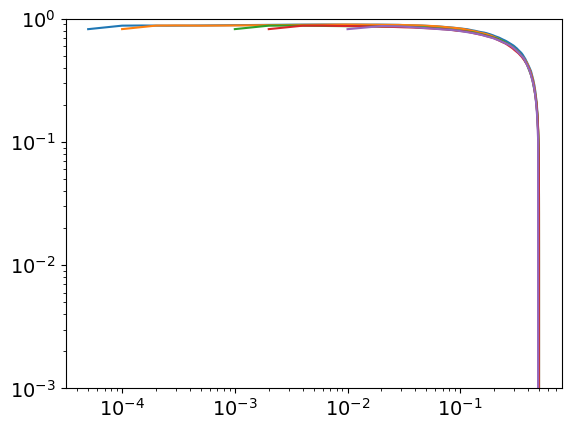

In [11]:
#Plotting rescaled microjam size and survival func-

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file for microjam sizes
file_name = 'microjam_size_distribution_rho_0pt5.xlsx'
df = pd.read_excel(file_name)

trial = 1000  # trial used for data
alpha = 0.51  # scaling exponent for the survival function

# Find unique L values from the column names in the file
L_array = [int(col.split('=')[1].split(')')[0]) for col in df.columns if 'Microjam sizes' in col]

# Plot the rescaled data for each L
plt.figure()

for aleph in reversed(range(len(L_array))):
    
    N = L_array[aleph]
    
    # Get the x (microjam sizes) and y (counts) data for this L
    x = df[f'Microjam sizes (L={L_array[aleph]})'].dropna().values
    y = df[f'Counts (L={L_array[aleph]})'].dropna().values
    
    # Normalize y (PDF) by dividing by the total sum
    y_normalized = y / np.sum(y)

    # Compute the cumulative sum of the normalized PDF to get the CDF
    cdf = np.cumsum(y_normalized)
    
    survival_func = 1 - cdf

    # Rescale the survival function and microjam size
    rescaled_survival_func = survival_func * (x ** alpha)
    rescaled_x = x / N

    # Plot the rescaled survival function vs. rescaled microjam size
    plt.loglog(rescaled_x, rescaled_survival_func, label=f'L={N}')

# Add plot labels and title
#plt.xlabel(r'Rescaled microjam size (x/$L^{d_f}$)')
#plt.ylabel(r'Rescaled survival func (f(x) * $x^{\alpha}$)')
plt.ylim(0.001,1)
plt.xticks(fontsize=14)  # Bigger font size for x-axis ticks
plt.yticks(fontsize=14)  # Bigger font size for y-axis ticks
#plt.title(r'Scaling collapse of Survival func of Microjam Sizes (with $\alpha$=0.5 and $d_f$ = 1)')
#plt.legend()

# Show the plot
plt.show()


$$S(x, p=p_c, L) = x^{-\alpha}f(x/L^{d_f})$$

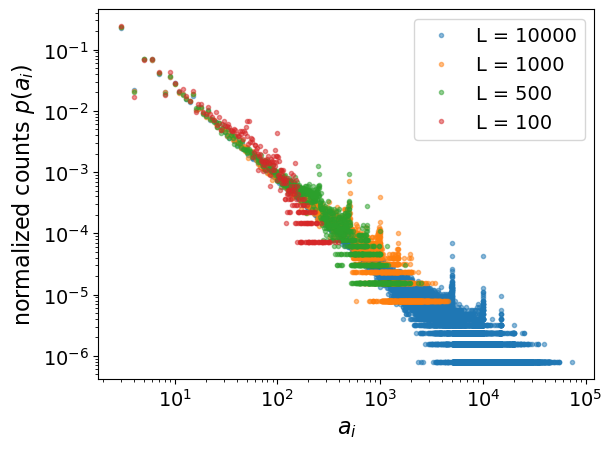

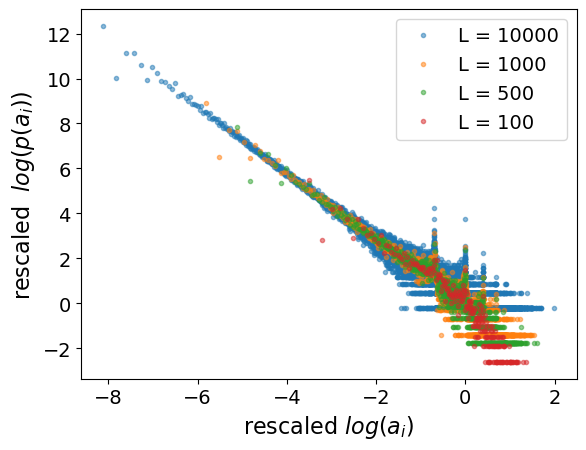

In [2]:
#FSS for cluster size distr

#library
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import Counter
from get_microjams import microjams
 
start = time.time()

L_array = np.array([100, 500, 1000, 10000])#, 20000])
cluster_size_count = np.zeros((len(L_array),(L_array[len(L_array)-1])*(L_array[len(L_array)-1])))

def add_to_cluster_size_count(arr, indice):
    
    current_sum = 0
    for num in arr:
        if num != 0:
            current_sum += num
        elif current_sum != 0:
            cluster_size_count[indice, int(current_sum - 1)] += 1
            current_sum = 0
    
    # Add the last cluster if it exists
    if current_sum != 0:
        cluster_size_count[indice, int(current_sum - 1)] += 1



trial = 1000

rho = 0.5 #upto three decimal places.. and rho <= 0.5

for aleph in range(len(L_array)):

    N = L_array[aleph] ####

    #we do first trial and set our counter

    #generation of initial_conditions with given rho

    for gamma in range(trial):
        ini_1 = np.ones(int(rho*N))
        ini_2 = np.zeros(N- int(rho*N))
        ini = np.concatenate((ini_1,ini_2))
        np.random.shuffle(ini)
        
        micro_jams_store = microjams(ini, rho, N)
        
        add_to_cluster_size_count(micro_jams_store, aleph)



end = time.time()

plt.figure()

tau = 1.5
df = 1
a = 1/df

#Unscaled distribution - 

for aleph in reversed(range(len(L_array))):
    
    non_zero_indices = np.nonzero(cluster_size_count[aleph, :])[0] #much faster than the list comprehension code!!
    
    # Increment the indices by 1 for x (as you did with i+1)
    x = non_zero_indices + 1
    
    # Use the same non_zero_indices to get the corresponding y values
    y = cluster_size_count[aleph, non_zero_indices]
    
    y = y / np.sum(y)
    
    #y = np.log(y) + (tau/a)*np.log(L_array[aleph])#np.log(y) + (l)*np.log(L_array[aleph])
    #x = np.log(x) - (1/a)*np.log(L_array[aleph])#np.log(x) + (m)*np.log(L_array[aleph])

    #x = [i+1 for i in range(len(cluster_size_count[aleph,:])) if cluster_size_count[aleph,i] != 0] #commented out because too slow for L = 20000
    #y = [cluster_size_count[aleph,i] for i in range(len(cluster_size_count[aleph,:])) if cluster_size_count[aleph,i] != 0]

    #x = np.array(x)
    #y = np.array(y)
    # Plot the counts as a function of the values
    #plt.loglog(np.arange(len(cluster_count)), cluster_count/trial,  marker='o', linestyle = 'none')
    plt.loglog(x, y, marker='.', linestyle = 'none', label = 'L = '+str(L_array[aleph]), alpha = 0.5)
#plt.title('Count of sizes of Clusters')
plt.xlabel(r'$a_i$', fontsize=16)  # LaTeX-style x-axis label with larger font
plt.ylabel(r'normalized counts $p(a_i)$', fontsize=16)  # LaTeX-style y-axis label with larger font
plt.xticks(fontsize=14)  # Bigger font size for x-axis ticks
plt.yticks(fontsize=14)  # Bigger font size for y-axis ticks
plt.legend(fontsize=14, frameon=True)  # Bigger font size for the legend
plt.show()
#FSS version - 
for aleph in reversed(range(len(L_array))):
    
    non_zero_indices = np.nonzero(cluster_size_count[aleph, :])[0] #much faster than the list comprehension code!!
    
    # Increment the indices by 1 for x (as you did with i+1)
    x = non_zero_indices + 1
    
    # Use the same non_zero_indices to get the corresponding y values
    y = cluster_size_count[aleph, non_zero_indices]
    
    y = y / np.sum(y)
    
    y = np.log(y) + (tau/a)*np.log(L_array[aleph])#np.log(y) + (l)*np.log(L_array[aleph])
    x = np.log(x) - (1/a)*np.log(L_array[aleph])#np.log(x) + (m)*np.log(L_array[aleph])

    #x = [i+1 for i in range(len(cluster_size_count[aleph,:])) if cluster_size_count[aleph,i] != 0] #commented out because too slow for L = 20000
    #y = [cluster_size_count[aleph,i] for i in range(len(cluster_size_count[aleph,:])) if cluster_size_count[aleph,i] != 0]

    #x = np.array(x)
    #y = np.array(y)
    # Plot the counts as a function of the values
    #plt.loglog(np.arange(len(cluster_count)), cluster_count/trial,  marker='o', linestyle = 'none')
    plt.plot(x, y, marker='.', linestyle = 'none', label = 'L = '+str(L_array[aleph]), alpha = 0.5)

plt.xlabel(r'rescaled $log(a_i)$', fontsize=16)  # LaTeX-style x-axis label with larger font
plt.ylabel(r'rescaled  $log(p(a_i))$', fontsize=16)  # LaTeX-style y-axis label with larger font
#plt.xlim(0, 1)  # Set x-axis limits
plt.xticks(fontsize=14)  # Bigger font size for x-axis ticks
plt.yticks(fontsize=14)  # Bigger font size for y-axis ticks
plt.legend(fontsize=14, frameon=True)  # Bigger font size for the legend
#plt.title('Count of sizes of Clusters')
#plt.grid(True)
plt.show()

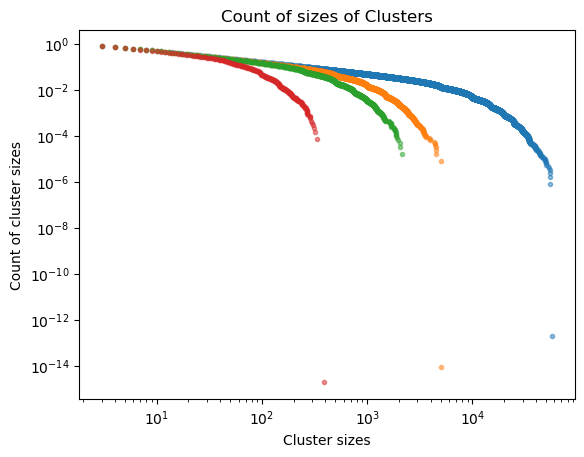

C:\Users\aryam\AppData\Local\Temp\ipykernel_72880\2804542818.py:109: RuntimeWarning: invalid value encountered in log
  y = np.log(y) + (tau/a)*np.log(L_array[aleph])#np.log(y) + (l)*np.log(L_array[aleph])


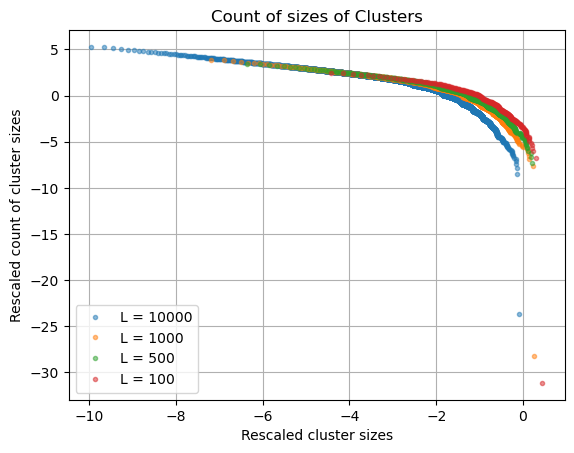

In [4]:
#FSS for cluster size distr

#library
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import Counter
from get_microjams import microjams
 
start = time.time()

L_array = np.array([100, 500, 1000, 10000])#, 20000])
cluster_size_count = np.zeros((len(L_array),(L_array[len(L_array)-1])*(L_array[len(L_array)-1])))

def add_to_cluster_size_count(arr, indice):
    
    current_sum = 0
    for num in arr:
        if num != 0:
            current_sum += num
        elif current_sum != 0:
            cluster_size_count[indice, int(current_sum - 1)] += 1
            current_sum = 0
    
    # Add the last cluster if it exists
    if current_sum != 0:
        cluster_size_count[indice, int(current_sum - 1)] += 1



trial = 1000

rho = 0.5 #upto three decimal places.. and rho <= 0.5

for aleph in range(len(L_array)):

    N = L_array[aleph] ####

    #we do first trial and set our counter

    #generation of initial_conditions with given rho

    for gamma in range(trial):
        ini_1 = np.ones(int(rho*N))
        ini_2 = np.zeros(N- int(rho*N))
        ini = np.concatenate((ini_1,ini_2))
        np.random.shuffle(ini)
        
        micro_jams_store = microjams(ini, rho, N)
        
        add_to_cluster_size_count(micro_jams_store, aleph)



end = time.time()

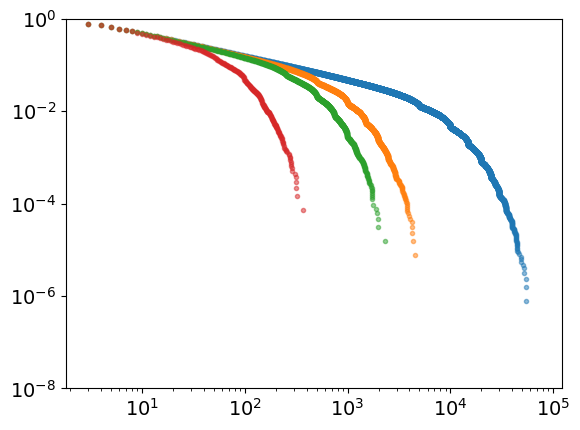

C:\Users\aryam\AppData\Local\Temp\ipykernel_27588\2546988553.py:56: RuntimeWarning: invalid value encountered in log
  y = np.log(y) + (tau/a)*np.log(L_array[aleph])#np.log(y) + (l)*np.log(L_array[aleph])


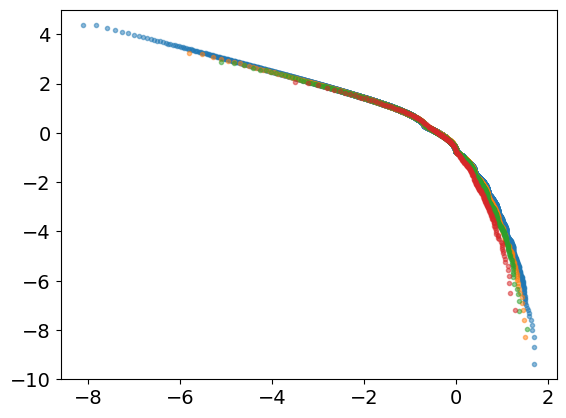

In [3]:
plt.figure()

tau = 0.505 #tau = 0.5 for surviv func and 1.5 for regular distribution
df = 1.0
a = 1/df

#Unscaled distribution - 

for aleph in reversed(range(len(L_array))):
    
    non_zero_indices = np.nonzero(cluster_size_count[aleph, :])[0] #much faster than the list comprehension code!!
    
    # Increment the indices by 1 for x (as you did with i+1)
    x = non_zero_indices + 1
    
    # Use the same non_zero_indices to get the corresponding y values
    y = cluster_size_count[aleph, non_zero_indices]
    
    y = y / np.sum(y)
    cdf = np.cumsum(y)## surv func code
    survival_func = 1 - cdf## surv func code
    y = survival_func## surv func code
    #y = np.log(y) + (tau/a)*np.log(L_array[aleph])#np.log(y) + (l)*np.log(L_array[aleph])
    #x = np.log(x) - (1/a)*np.log(L_array[aleph])#np.log(x) + (m)*np.log(L_array[aleph])

    #x = [i+1 for i in range(len(cluster_size_count[aleph,:])) if cluster_size_count[aleph,i] != 0] #commented out because too slow for L = 20000
    #y = [cluster_size_count[aleph,i] for i in range(len(cluster_size_count[aleph,:])) if cluster_size_count[aleph,i] != 0]

    #x = np.array(x)
    #y = np.array(y)
    # Plot the counts as a function of the values
    #plt.loglog(np.arange(len(cluster_count)), cluster_count/trial,  marker='o', linestyle = 'none')
    plt.loglog(x, y, marker='.', linestyle = 'none', label = 'L = '+str(L_array[aleph]), alpha = 0.5)
#plt.xlabel('Cluster sizes')
#plt.ylabel('Count of cluster sizes')
plt.ylim(0.00000001,1)
plt.xticks(fontsize=14)  # Bigger font size for x-axis ticks
plt.yticks(fontsize=14)  # Bigger font size for y-axis ticks
#plt.title('Count of sizes of Clusters')
plt.show()
#FSS version - 
for aleph in reversed(range(len(L_array))):
    
    non_zero_indices = np.nonzero(cluster_size_count[aleph, :])[0] #much faster than the list comprehension code!!
    
    # Increment the indices by 1 for x (as you did with i+1)
    x = non_zero_indices + 1
    
    # Use the same non_zero_indices to get the corresponding y values
    y = cluster_size_count[aleph, non_zero_indices]
    
    y = y / np.sum(y)
    cdf = np.cumsum(y)## surv func code
    survival_func = 1 - cdf## surv func code
    y = survival_func## surv func code
    y = np.log(y) + (tau/a)*np.log(L_array[aleph])#np.log(y) + (l)*np.log(L_array[aleph])
    x = np.log(x) - (1/a)*np.log(L_array[aleph])#np.log(x) + (m)*np.log(L_array[aleph])

    #x = [i+1 for i in range(len(cluster_size_count[aleph,:])) if cluster_size_count[aleph,i] != 0] #commented out because too slow for L = 20000
    #y = [cluster_size_count[aleph,i] for i in range(len(cluster_size_count[aleph,:])) if cluster_size_count[aleph,i] != 0]

    #x = np.array(x)
    #y = np.array(y)
    # Plot the counts as a function of the values
    #plt.loglog(np.arange(len(cluster_count)), cluster_count/trial,  marker='o', linestyle = 'none')
    plt.plot(x, y, marker='.', linestyle = 'none', label = 'L = '+str(L_array[aleph]), alpha = 0.5)

#plt.xlabel('Rescaled cluster sizes')
#plt.ylabel('Rescaled count of cluster sizes')
plt.ylim(-10,5)
plt.xticks(fontsize=14)  # Bigger font size for x-axis ticks
plt.yticks(fontsize=14)  # Bigger font size for y-axis ticks
#plt.title('Count of sizes of Clusters')
#plt.legend(loc = 'best')
#plt.grid(True)
plt.show()

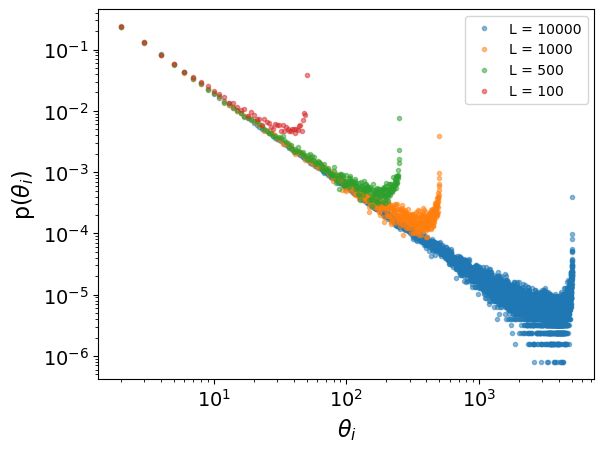

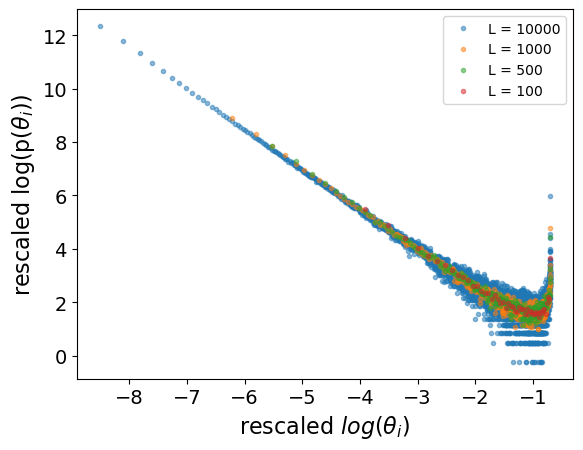

In [13]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
import time
from get_microjams import microjams

# Timing the code execution
start = time.time()

# Define system sizes
L_array = np.array([100, 500, 1000, 10000])
cluster_lifetime_count = np.zeros((len(L_array), L_array[-1]))

# Function to update the lifetime count
def add_to_cluster_lifetime_count(arr, indice):
    current_max = 0

    for num in arr:
        if num != 0:
            current_max = max(current_max, num)
        elif current_max != 0:
            cluster_lifetime_count[indice, int(current_max - 1)] += 1
            current_max = 0

    # Add the last cluster if it exists
    if current_max != 0:
        cluster_lifetime_count[indice, int(current_max - 1)] += 1

# Simulation parameters
trial = 1000
rho = 0.5  # Density, rho <= 0.5

# Loop over different system sizes
for aleph in range(len(L_array)):
    N = L_array[aleph]

    # Run multiple trials
    for gamma in range(trial):
        # Generate initial condition with given rho
        ini_1 = np.ones(int(rho * N))
        ini_2 = np.zeros(N - int(rho * N))
        ini = np.concatenate((ini_1, ini_2))
        np.random.shuffle(ini)

        # Get the microjam array from the external function
        micro_jams_store = microjams(ini, rho, N)

        # Update the lifetime counts
        add_to_cluster_lifetime_count(micro_jams_store, aleph)

# End of timing
end = time.time()

# Plotting the unscaled lifetime distribution
plt.figure()
for aleph in reversed(range(len(L_array))):
    non_zero_indices = np.nonzero(cluster_lifetime_count[aleph, :])[0]
    x = non_zero_indices + 1
    y = cluster_lifetime_count[aleph, non_zero_indices]
    y = y / np.sum(y)

    plt.loglog(x, y, marker='.', linestyle='none', label=f'L = {L_array[aleph]}', alpha=0.5)

plt.xlabel(r'$\theta_i$', fontsize=16)
plt.ylabel(r'p($\theta_i$)', fontsize=16)
#plt.title('Unscaled Lifetime Distribution')
plt.xticks(fontsize=14)  # Bigger font size for x-axis ticks
plt.yticks(fontsize=14)  # Bigger font size for y-axis ticks
plt.legend()  # Bigger font size for the legend
#plt.grid()
plt.show()

# Finite Size Scaling (FSS) analysis for lifetime distribution
tau = 1.5
df = 1
a = 1 / df

plt.figure()
for aleph in reversed(range(len(L_array))):
    non_zero_indices = np.nonzero(cluster_lifetime_count[aleph, :])[0]
    x = non_zero_indices + 1
    y = cluster_lifetime_count[aleph, non_zero_indices]
    y = y / np.sum(y)

    # Apply Finite Size Scaling transformation
    y = np.log(y) + (tau / a) * np.log(L_array[aleph])
    x = np.log(x) - (1 / a) * np.log(L_array[aleph])

    plt.plot(x, y, marker='.', linestyle='none', label=f'L = {L_array[aleph]}', alpha=0.5)

plt.xlabel(r'rescaled $log(\theta_i)$', fontsize=16)
plt.ylabel(r'rescaled log(p($\theta_i$))', fontsize=16)
#plt.title('Unscaled Lifetime Distribution')
plt.xticks(fontsize=14)  # Bigger font size for x-axis ticks
plt.yticks(fontsize=14)  # Bigger font size for y-axis ticks
plt.legend()  # Bigger font size for the legend
#plt.grid()
plt.show()


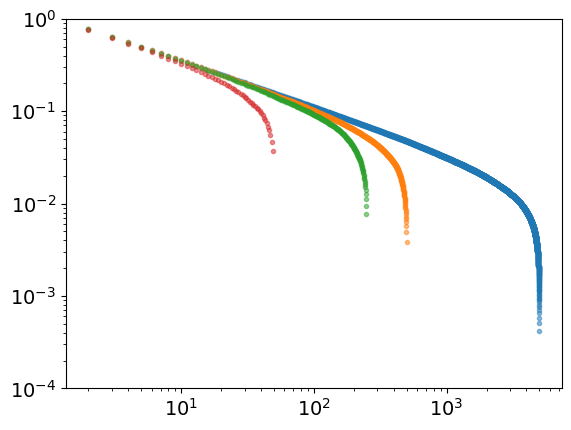

C:\Users\aryam\AppData\Local\Temp\ipykernel_27588\2468727209.py:99: RuntimeWarning: invalid value encountered in log
  y = np.log(y) + (tau / a) * np.log(L_array[aleph])


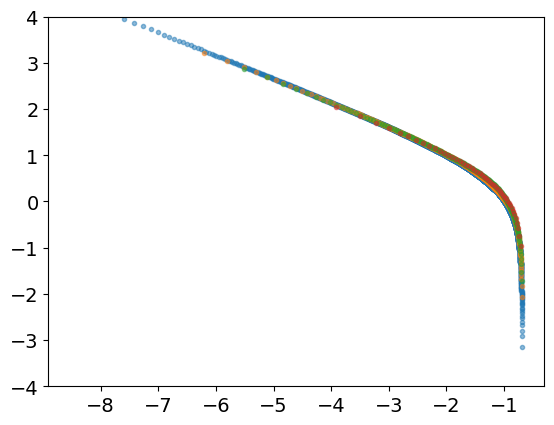

In [14]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
import time
from get_microjams import microjams

# Timing the code execution
start = time.time()

# Define system sizes
L_array = np.array([100, 500, 1000, 10000])
cluster_lifetime_count = np.zeros((len(L_array), L_array[-1]))

# Function to update the lifetime count
def add_to_cluster_lifetime_count(arr, indice):
    current_max = 0

    for num in arr:
        if num != 0:
            current_max = max(current_max, num)
        elif current_max != 0:
            cluster_lifetime_count[indice, int(current_max - 1)] += 1
            current_max = 0

    # Add the last cluster if it exists
    if current_max != 0:
        cluster_lifetime_count[indice, int(current_max - 1)] += 1

# Simulation parameters
trial = 1000
rho = 0.5  # Density, rho <= 0.5

# Loop over different system sizes
for aleph in range(len(L_array)):
    N = L_array[aleph]

    # Run multiple trials
    for gamma in range(trial):
        # Generate initial condition with given rho
        ini_1 = np.ones(int(rho * N))
        ini_2 = np.zeros(N - int(rho * N))
        ini = np.concatenate((ini_1, ini_2))
        np.random.shuffle(ini)

        # Get the microjam array from the external function
        micro_jams_store = microjams(ini, rho, N)

        # Update the lifetime counts
        add_to_cluster_lifetime_count(micro_jams_store, aleph)

# End of timing
end = time.time()

# Survival Function Plot for Lifetime Distribution
plt.figure()
tau = 0.505  # Use tau = 0.5 for survival function and tau = 1.5 for regular distribution
df = 1.0
a = 1 / df

# Unscaled Survival Function
for aleph in reversed(range(len(L_array))):
    non_zero_indices = np.nonzero(cluster_lifetime_count[aleph, :])[0]
    x = non_zero_indices + 1
    y = cluster_lifetime_count[aleph, non_zero_indices]
    y = y / np.sum(y)

    # Compute the CDF and Survival Function
    cdf = np.cumsum(y)
    survival_func = 1 - cdf

    # Plot the survival function
    plt.loglog(x, survival_func, marker='.', linestyle='none', label=f'L = {L_array[aleph]}', alpha=0.5)

#plt.xlabel('Lifetime')
#plt.ylabel('Survival Function')
plt.ylim(1e-4, 1)
#plt.legend()
plt.xticks(fontsize=14)  # Bigger font size for x-axis ticks
plt.yticks(fontsize=14)  # Bigger font size for y-axis ticks
#plt.title('Count of sizes of Clusters')
#plt.legend(loc = 'best')
#plt.grid(True)
plt.show()

# Finite Size Scaling (FSS) for Survival Function
plt.figure()
for aleph in reversed(range(len(L_array))):
    non_zero_indices = np.nonzero(cluster_lifetime_count[aleph, :])[0]
    x = non_zero_indices + 1
    y = cluster_lifetime_count[aleph, non_zero_indices]
    y = y / np.sum(y)

    # Compute the CDF and Survival Function
    cdf = np.cumsum(y)
    survival_func = 1 - cdf

    # Apply FSS transformation
    y = survival_func
    y = np.log(y) + (tau / a) * np.log(L_array[aleph])
    x = np.log(x) - (1 / a) * np.log(L_array[aleph])

    # Plot the rescaled survival function
    plt.plot(x, y, marker='.', linestyle='none', label=f'L = {L_array[aleph]}', alpha=0.5)

#plt.xlabel('Rescaled Lifetime')
#plt.ylabel('Rescaled Survival Function')
plt.ylim(-4, 4)
#plt.legend(loc='best')
plt.xticks(fontsize=14)  # Bigger font size for x-axis ticks
plt.yticks(fontsize=14)  # Bigger font size for y-axis ticks
#plt.title('Count of sizes of Clusters')
#plt.legend(loc = 'best')
#plt.grid(True)
plt.show()

Alpha (1 + tau): 1.480, Fractal Dimension (D_f): 1.00


C:\Users\aryam\AppData\Local\Temp\ipykernel_27588\3480365364.py:80: RuntimeWarning: invalid value encountered in log
  y = np.log(y) + (tau / a) * np.log(L_array[aleph])


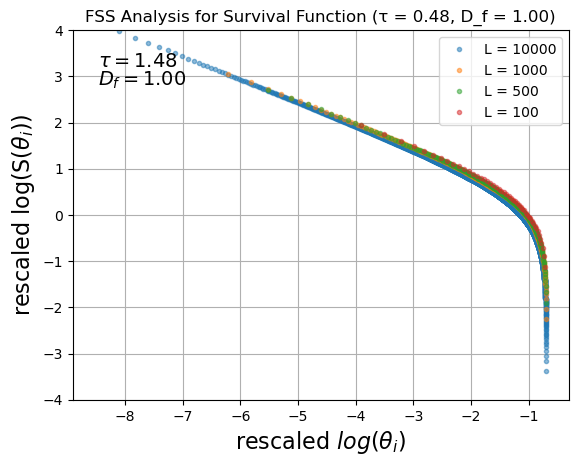

Alpha (1 + tau): 1.500, Fractal Dimension (D_f): 1.00


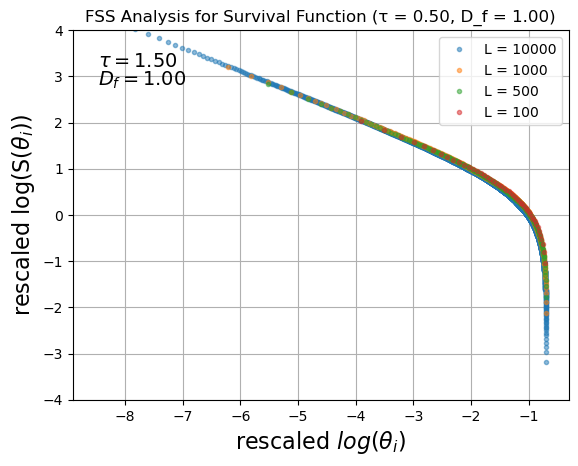

Alpha (1 + tau): 1.520, Fractal Dimension (D_f): 1.00


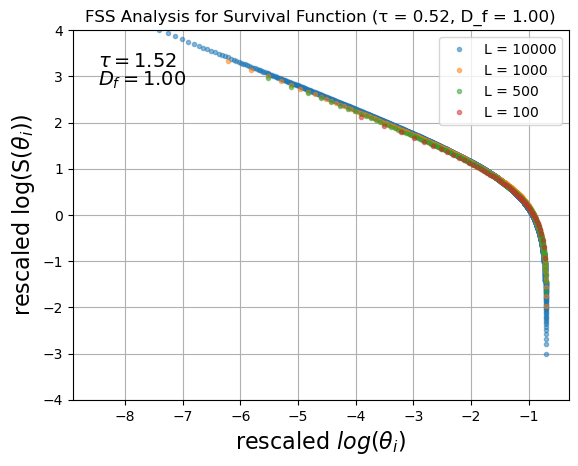

Alpha (1 + tau): 1.540, Fractal Dimension (D_f): 1.00


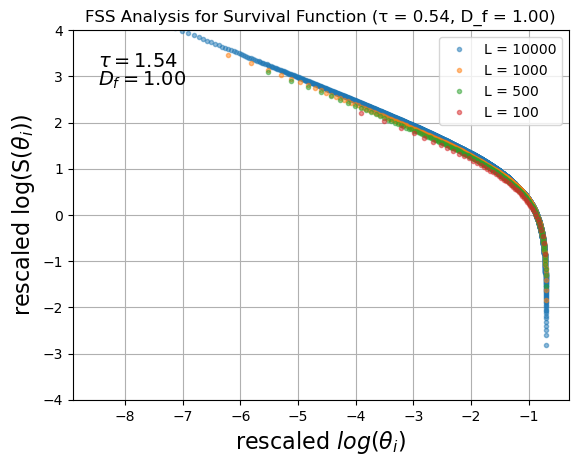

In [21]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
import time
from get_microjams import microjams

# Timing the code execution
start = time.time()

# Define system sizes
L_array = np.array([100, 500, 1000, 10000])
cluster_lifetime_count = np.zeros((len(L_array), L_array[-1]))

# Function to update the lifetime count
def add_to_cluster_lifetime_count(arr, indice):
    current_max = 0

    for num in arr:
        if num != 0:
            current_max = max(current_max, num)
        elif current_max != 0:
            cluster_lifetime_count[indice, int(current_max - 1)] += 1
            current_max = 0

    # Add the last cluster if it exists
    if current_max != 0:
        cluster_lifetime_count[indice, int(current_max - 1)] += 1

# Simulation parameters
trial = 1000
rho = 0.5  # Density, rho <= 0.5

# Loop over different system sizes
for aleph in range(len(L_array)):
    N = L_array[aleph]

    # Run multiple trials
    for gamma in range(trial):
        # Generate initial condition with given rho
        ini_1 = np.ones(int(rho * N))
        ini_2 = np.zeros(N - int(rho * N))
        ini = np.concatenate((ini_1, ini_2))
        np.random.shuffle(ini)

        # Get the microjam array from the external function
        micro_jams_store = microjams(ini, rho, N)

        # Update the lifetime counts
        add_to_cluster_lifetime_count(micro_jams_store, aleph)

# End of timing
end = time.time()

# Define a list of tau values to loop over
tau_values = [0.48, 0.50, 0.52, 0.54]
df = 1.0  # Fractal dimension (kept constant)
a = 1 / df

# Loop over different tau values and generate FSS plots
for tau in tau_values:
    plt.figure()
    
    # Print the values of 1 + tau and D_f
    alpha = 1 + tau
    print(f"Alpha (1 + tau): {alpha:.3f}, Fractal Dimension (D_f): {df:.2f}")

    # Plot the FSS for the survival function
    for aleph in reversed(range(len(L_array))):
        non_zero_indices = np.nonzero(cluster_lifetime_count[aleph, :])[0]
        x = non_zero_indices + 1
        y = cluster_lifetime_count[aleph, non_zero_indices]
        y = y / np.sum(y)

        # Compute the CDF and Survival Function
        cdf = np.cumsum(y)
        survival_func = 1 - cdf

        # Apply FSS transformation
        y = survival_func
        y = np.log(y) + (tau / a) * np.log(L_array[aleph])
        x = np.log(x) - (1 / a) * np.log(L_array[aleph])

        # Plot the rescaled survival function
        plt.plot(x, y, marker='.', linestyle='none', label=f'L = {L_array[aleph]}', alpha=0.5)

    # Add labels, title, and print values on the plot
    plt.xlabel(r'rescaled $log(\theta_i)$', fontsize = 16)
    plt.ylabel(r'rescaled log(S($\theta_i$))', fontsize = 16)
    plt.title(f'FSS Analysis for Survival Function (τ = {tau:.2f}, D_f = {df:.2f})')
    plt.text(0.05, 0.9, f"$\\tau = {alpha:.2f}$", transform=plt.gca().transAxes, fontsize=14, fontweight='bold')
    plt.text(0.05, 0.85, f"$D_f = {df:.2f}$", transform=plt.gca().transAxes, fontsize=14, fontweight='bold')
    plt.ylim(-4, 4)
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()


Alpha (1 + tau): 1.480, Fractal Dimension (D_f): 1.00
Alpha (1 + tau): 1.500, Fractal Dimension (D_f): 1.00
Alpha (1 + tau): 1.520, Fractal Dimension (D_f): 1.00
Alpha (1 + tau): 1.540, Fractal Dimension (D_f): 1.00


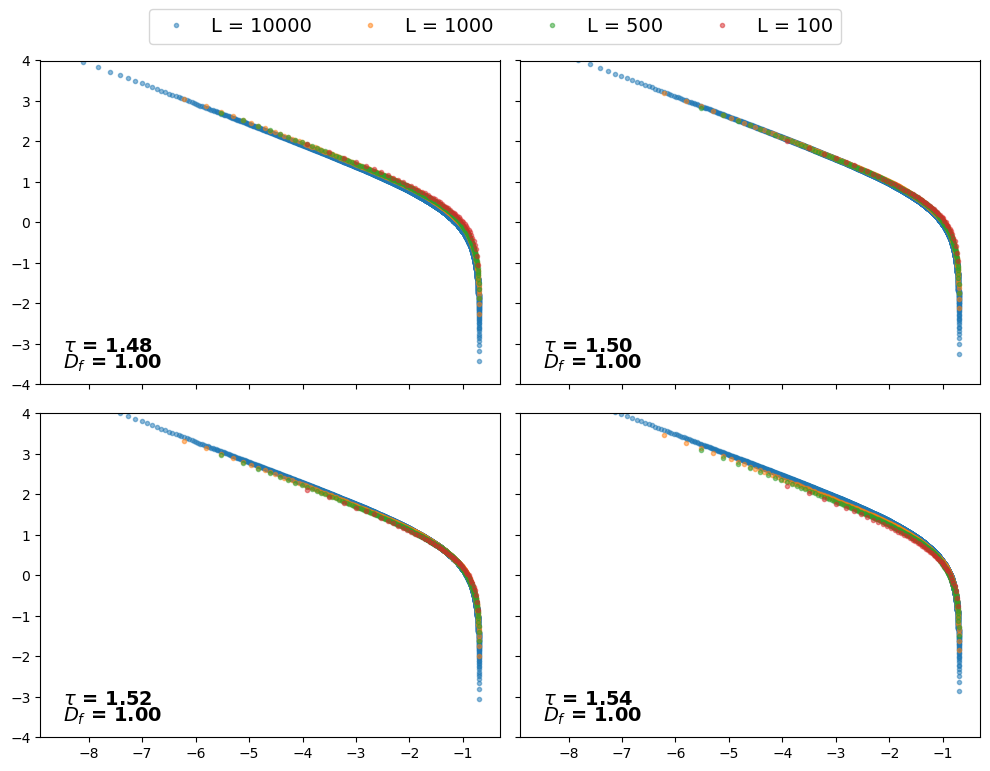

In [20]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
import time
from get_microjams import microjams

# Timing the code execution
start = time.time()

# Define system sizes
L_array = np.array([100, 500, 1000, 10000])
cluster_lifetime_count = np.zeros((len(L_array), L_array[-1]))

# Function to update the lifetime count
def add_to_cluster_lifetime_count(arr, indice):
    current_max = 0

    for num in arr:
        if num != 0:
            current_max = max(current_max, num)
        elif current_max != 0:
            cluster_lifetime_count[indice, int(current_max - 1)] += 1
            current_max = 0

    # Add the last cluster if it exists
    if current_max != 0:
        cluster_lifetime_count[indice, int(current_max - 1)] += 1

# Simulation parameters
trial = 1000
rho = 0.5  # Density, rho <= 0.5

# Loop over different system sizes
for aleph in range(len(L_array)):
    N = L_array[aleph]

    # Run multiple trials
    for gamma in range(trial):
        # Generate initial condition with given rho
        ini_1 = np.ones(int(rho * N))
        ini_2 = np.zeros(N - int(rho * N))
        ini = np.concatenate((ini_1, ini_2))
        np.random.shuffle(ini)

        # Get the microjam array from the external function
        micro_jams_store = microjams(ini, rho, N)

        # Update the lifetime counts
        add_to_cluster_lifetime_count(micro_jams_store, aleph)

# End of timing
end = time.time()

# Define a list of tau values and create the plot layout
tau_values = [0.48, 0.50, 0.52, 0.54]
df = 1.0  # Fractal dimension (kept constant)
a = 1 / df

fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axs = axs.flatten()

for idx, tau in enumerate(tau_values):
    ax = axs[idx]

    # Print the values of 1 + tau and D_f
    alpha = 1 + tau
    print(f"Alpha (1 + tau): {alpha:.3f}, Fractal Dimension (D_f): {df:.2f}")

    # Plot the FSS for the survival function
    for aleph in reversed(range(len(L_array))):
        non_zero_indices = np.nonzero(cluster_lifetime_count[aleph, :])[0]
        x = non_zero_indices + 1
        y = cluster_lifetime_count[aleph, non_zero_indices]
        y = y / np.sum(y)

        # Compute the CDF and Survival Function
        cdf = np.cumsum(y)
        survival_func = 1 - cdf

        # Apply FSS transformation
        y = survival_func
        y = np.log(y) + (tau / a) * np.log(L_array[aleph])
        x = np.log(x) - (1 / a) * np.log(L_array[aleph])

        # Plot the rescaled survival function
        ax.plot(x, y, marker='.', linestyle='none', label=f'L = {L_array[aleph]}', alpha=0.5)
        ax.set_ylim(-4, 4)

    # Add tau and D_f values to the plot
    ax.text(0.05, 0.1, r'$ \tau$'+ f' = {alpha:.2f}', transform=ax.transAxes, fontsize=14, fontweight='bold')
    ax.text(0.05, 0.05, r'$D_f$' + f' = {df:.2f}', transform=ax.transAxes, fontsize=14, fontweight='bold')

    # Remove grid and title
    ax.grid(False)

# Add shared labels and legend
#fig.text(0.5, 0.04, r'rescaled $log(\theta_i)$', ha='center', fontsize=16)
#fig.text(0.04, 0.5, r'rescaled log(S($\theta_i$))', va='center', rotation='vertical', fontsize=16)

# Create a shared legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(L_array), fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
